In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import json

import sys
sys.path.append("../src")
from gait_gft import *


path_to_project = os.path.join('..')
misc_path = os.path.join(path_to_project, 'config')

with open(os.path.join(misc_path,'time_thresholds.json'), 'r') as f:
  time_thresholds = json.load(f)

# Graph Definition

In [4]:
with open(os.path.join(misc_path, 'links.txt'),'r') as f:
    text = f.read()

nodes = [line.split('\t')[1] for line in text.split('\n')]
edges = [tuple(line.split('\t')[1:]) for line in text.split('\n')[1:]]

skeleton = GraphModel(edges, node_list=nodes)

# Data Preprocessing

In [5]:
path_to_zip = os.path.join(path_to_project, 'data', 'HDA_proj_A2.zip')
preproc = SkeletonPreprocessor(path_to_zip, nodes, time_thresholds)

r = preproc.load_and_process('subject1/normal/trial3/skeleton.csv')

# Signal and Gait definition

In [6]:
gait = GaitTrial(r, skeleton, label='normal')
# gait.vx.X_hat
# gait.vx.X

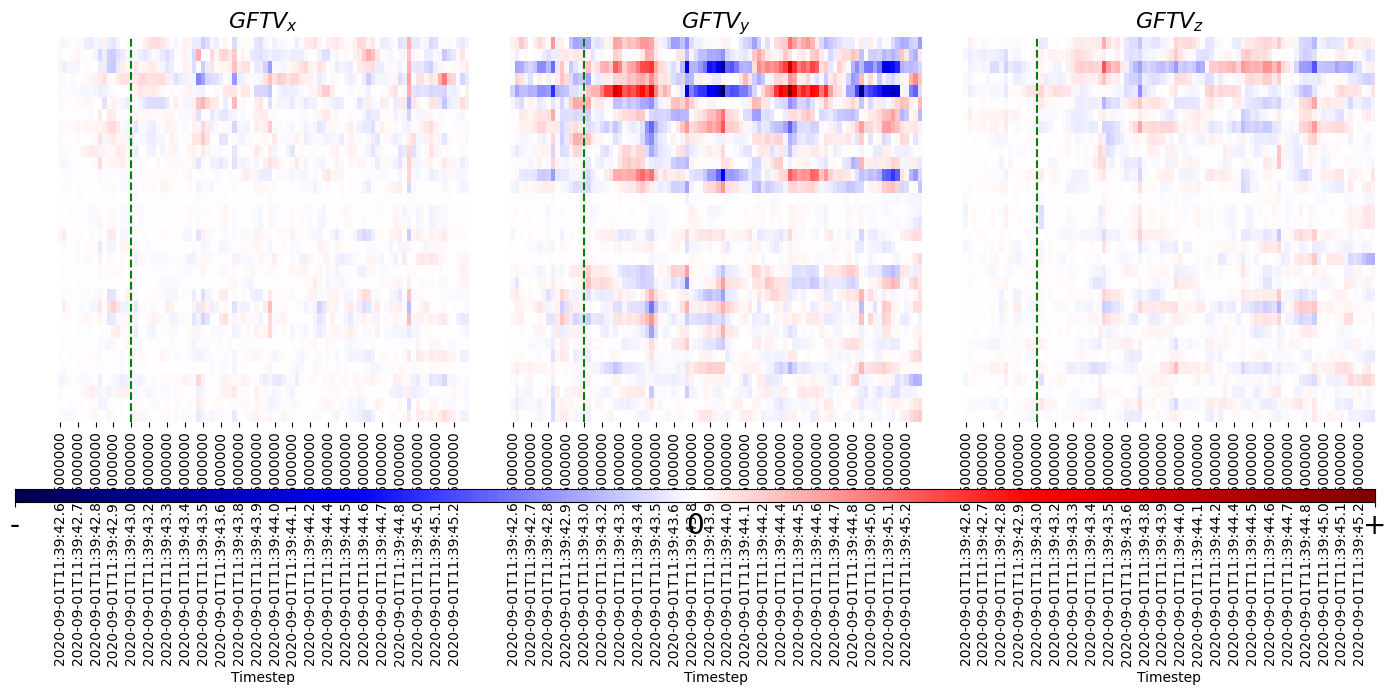

In [7]:
frame = 16

channels = ['x', 'y', 'z']
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
plt.subplots_adjust(wspace=0.1)

v_max = max([gait.gft_dict[channel].X_hat.abs().max().max() for channel in ['x', 'y', 'z']])

for channel, ax in zip(channels, axes):
    df = gait.gft_dict[channel].X_hat

    sns.heatmap(df, cmap='seismic', center=0, cbar=False,
                vmin=-v_max, vmax=v_max,
                yticklabels=False, #square=True,
                ax=ax)

    ax.set_title(f"$GFT V_{channel}$", fontsize=16)
    # ax.set_yticks(np.arange(32) + 0.5)
    # ax.set_yticklabels(nodes, fontsize=8)
    ax.set_xlabel('Timestep', fontsize=10)

    ax.axvline(frame + 0.5, color='green', linestyle='dashed', linewidth=1.5)


gradient_ax = fig.add_axes([0.1, -0.05, 0.8, 0.025])  # Position for the colorbar
gradient = np.linspace(-1, 1, 256).reshape(1, -1)  # Generate gradient data from -1 to 1
gradient_ax.imshow(gradient, aspect='auto', cmap='seismic', extent=[-1, 1, 0, 1])
gradient_ax.set_xticks([-1, 0, 1])
gradient_ax.set_xticklabels(['-', '0', '+'], fontsize=4)
gradient_ax.set_yticks([])
gradient_ax.tick_params(axis='x', labelsize=20)
fig.savefig(f'normal_gait_nodes_vs_time_signals_grid.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# El objeto gait debe:
# -tener metodo de filtro, que guarde en filtered signal
# -usando el filtered signal, que sea capaz de recuperar las posiciones originales

# Después de definir objetos para graficar y animar,
# escribir notebook que muestre cómo usarlo

# Estructurar carpeta de archivos para subir a github

# Referenciar tesis, paper de origen de datos

In [9]:
# Debería entregar:
# - Notebook coherente, mostrando resultados (que el lector interprete el código)
# - Replicar gráficas más relevantes de la tesis
    # Matriz U e evals
    # grid esqueletos con evecs
    # signal vs. GFT
    # plot energia
    # columnas, una por cada tipo patologia

# - Animaciones más relevantes (esqueleto,esqueleto con vectores, esqueleto con/sin vectores y modos laterales (enlistar),
        # grid 6 esqueletos, [GFT(t) + energia, con esqueleto a un lado, barra vertical que recorra los modos normales])

In [10]:
# Debería tener un GitHub con:
# - data
# - archivos adicionales
# - notebook
# - presentación